# ZUNYI LIN

## Research question/interests

1. What goal and project duration setting are most likely to fail on kickstarters?
2. What project category can have the highest pledge vs goal ratio?


In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("../data/raw/ks-projects-201801.csv")

In [3]:
dataset

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


# Milestone 3

#### Task 1 - Data Analysis

In [4]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

print("Number of rows and columns respectively:", dataset.shape)
print("Columns in the dataset:", dataset.columns)

Number of rows and columns respectively: (378661, 15)
Columns in the dataset: Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


#### Remove unnecessary data

In [5]:
dataset1 = dataset.drop(columns = ['ID', 'usd pledged', 'currency', 'goal', 'pledged', 'country'], inplace = False)
dataset1.head()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,1283.0,19500.00


In [6]:
dataset2 = dataset1.dropna()

In [7]:
dataset3 = dataset2.rename(columns={"usd_pledged_real": "pledged", "usd_goal_real": "goal", "state": "status"})

#### Get an overview of the data

In [8]:
dataset3.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
backers,378657.0,105.618544,9.071898e+02,0.00,2.0,12.00,56.0,2.193820e+05
pledged,378657.0,9059.018090,9.097382e+04,0.00,31.0,624.38,4050.0,2.033899e+07
goal,378657.0,45454.245896,1.152956e+06,0.01,2000.0,5500.00,15500.0,1.663614e+08


In [9]:
dataset3.describe(include='object').T

,count,unique,top,freq
name,378657,375764,New EP/Music Development,41
category,378657,159,Product Design,22313
main_category,378657,15,Film & Video,63584
deadline,378657,3164,2014-08-08,705
launched,378657,378085,1970-01-01 01:00:00,7
status,378657,6,failed,197716


In [10]:
#Due to the large dataset, it is too slow to work with, 
#I have to reduce the rows inorder to get some progress within deadline

dataset4 = dataset3[(dataset3['backers'] > 2) 
                    & (dataset3['backers'] < 56) 
                    & (dataset3['goal'] < 150000)
                    & (dataset3['goal'] > 2000)]
dataset4

,name,category,main_category,deadline,launched,status,backers,pledged,goal
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.00,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.00,45000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,1283.00,19500.00
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,2016-03-17,2016-02-01 20:05:12,failed,40,453.00,25000.00
9,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,2014-08-10,2014-07-11 21:55:48,canceled,43,6240.57,65000.00
...,...,...,...,...,...,...,...,...,...
378645,The Chronicles of Erinoth - A Graphic Novel,Comics,Comics,2013-10-10,2013-09-10 22:45:26,failed,38,4374.99,25566.05
378647,The Cease is Increase,Nonfiction,Publishing,2012-09-14,2012-08-15 17:11:00,failed,16,980.00,4999.00
378652,Beach Wrestling Documentary,Documentary,Film & Video,2015-04-28,2015-03-29 21:30:33,successful,36,2875.83,2675.19
378654,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,2017-04-19,2017-03-20 22:08:22,failed,4,154.00,6500.00


In [11]:
dataset5 = dataset4.copy()
dataset5['launched'] = pd.to_datetime(dataset5['launched'])
dataset5['deadline'] = pd.to_datetime(dataset5['deadline'])
dataset5['duration'] = (dataset5['deadline'] - dataset5['launched']).dt.days
dataset5

,name,category,main_category,deadline,launched,status,backers,pledged,goal,duration
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.00,30000.00,59
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.00,45000.00,44
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,1283.00,19500.00,55
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,2016-03-17,2016-02-01 20:05:12,failed,40,453.00,25000.00,44
9,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,2014-08-10,2014-07-11 21:55:48,canceled,43,6240.57,65000.00,29
...,...,...,...,...,...,...,...,...,...,...
378645,The Chronicles of Erinoth - A Graphic Novel,Comics,Comics,2013-10-10,2013-09-10 22:45:26,failed,38,4374.99,25566.05,29
378647,The Cease is Increase,Nonfiction,Publishing,2012-09-14,2012-08-15 17:11:00,failed,16,980.00,4999.00,29
378652,Beach Wrestling Documentary,Documentary,Film & Video,2015-04-28,2015-03-29 21:30:33,successful,36,2875.83,2675.19,29
378654,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,2017-04-19,2017-03-20 22:08:22,failed,4,154.00,6500.00,29


<AxesSubplot:xlabel='status', ylabel='goal'>

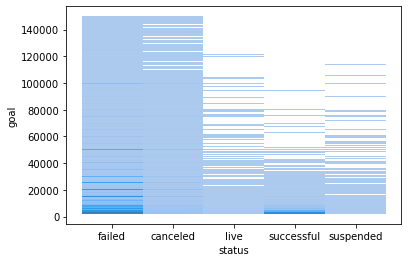

In [12]:
sns.histplot(data=dataset5, x='status', y='goal')

<AxesSubplot:xlabel='status', ylabel='duration'>

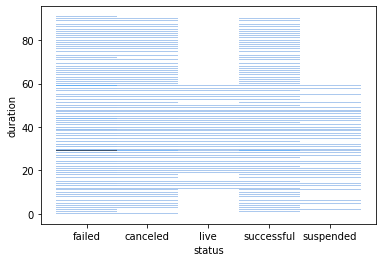

In [13]:
sns.histplot(data=dataset5, x='status', y='duration')

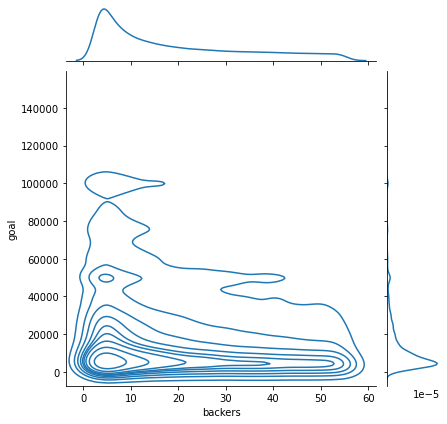

In [14]:
sns.jointplot(x='backers', y='goal', data=dataset5, kind='kde')

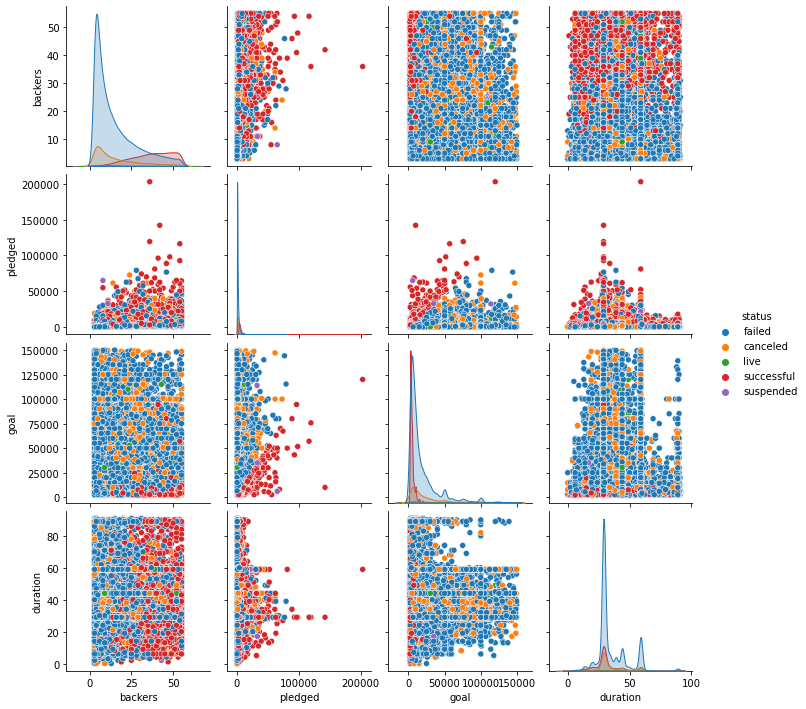

In [15]:
sns.pairplot(dataset5, hue = 'status')

#### Task 2-3 - Load Raw and Processed Data

#### 1. Load Raw Data

In [16]:
import project_functions2 as pf2

In [17]:
datafilepath = "../data/raw/ks-projects-201801.csv"
rawdf = pf2.unprocessed(datafilepath)
rawdf

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


#### 2. Load Processed Data

In [18]:
processeddata = pf2.load_and_process(datafilepath)
processeddata

,ID,name,category,main_category,deadline,launched,status,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,2014-10-17,2014-09-17 02:35:30,canceled,1,US,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,2016-02-13,2016-01-13 18:13:53,failed,6,US,200.0,15000.00
